# 母数団からの標本抽出シミュレーション

In [3]:
# 数値計算に使うライブラリ
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
# グラフを描画するライブラリ
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
# 表示桁数の指定
%precision 3
# グラフをjupyter Notebook 内に表示するための指定
%matplotlib inline

## 標本が得られるプロセス

標本は確率変数である<br>
例えば母集団が5匹の魚が存在する湖、そこから１匹を釣り上げ標本とする場合<br>
5尾のどの魚が選ばれるかは確率的に決まるということ<br>
<br>

## 5尾の魚しかいない湖からの標本抽出

In [5]:
fish5 = np.array([2,3,4,5,6])
fish5

array([2, 3, 4, 5, 6])

choice関数<br>
size = n : サンプルサイズがnとする<br>
replace = False と指定すると同じ魚が2回以上選ばれることはない、としている

In [9]:
np.random.choice(fish5, size = 1, replace = False)

array([2])

In [10]:
np.random.choice(fish5, size = 3, replace = False)

array([5, 4, 2])

seedの指定もできる

In [11]:
np.random.seed(1)
np.random.choice(fish5, size = 3, replace = False)

array([4, 3, 6])

標本平均

In [12]:
np.random.seed(1)
sp.mean(
np.random.choice(fish5, size = 3, replace = False)
)

4.333333333333333

## 復元抽出・非復元抽出

復元抽出とは抽出した標本をまた母集団に戻してから再度抽出するサンプリングの方法<br>

## もっとたくさんの魚がいる湖からの標本抽出

In [4]:
fish100000 = pd.read_csv(
"./sample/3-4-1-fish_length_100000.csv")["length"]
fish100000.head()

0    5.297442
1    3.505566
2    3.572546
3    3.135979
4    4.689275
Name: length, dtype: float64

In [15]:
len(fish100000)

100000

In [17]:
sampling_result = np.random.choice(
    fish100000, size = 10, replace = False
)
sampling_result

array([4.064, 5.065, 3.704, 4.476, 4.845, 3.686, 3.626, 4.182, 4.083,
       4.111])

In [18]:
sp.mean(sampling_result)

4.184232234844187

## 母集団分布

母集団平均

In [19]:
sp.mean(fish100000)

4.000

母標準偏差

In [21]:
sp.std(fish100000, ddof=0)

0.800

母分散

In [22]:
sp.var(fish100000,ddof =0)

0.640

/home/yu/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


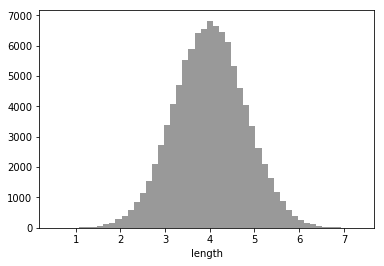

In [23]:
sns.distplot(fish100000,kde=False,color='black')

体調の平均4センチを中心として左右対称な度数分布となっている<br>
ここで母集団の確率分布は「平均4,分散0.64の正規分布」として表現できる<br>
のではないかと仮定を立てられる。<br>
この仮定を置くことで（母集団の全数調査をすることなく）母集団の特性について議論しやすくなる

## 母集団分布と正規分布の確率密度関数の比較

平均4,分散0.64の正規分布の確率密度をつくり比較する<br>
1~7までを0.1区切りで分けた等差数列を用意する<br>

In [31]:
x = np.arange(start = 1,stop = 7.1,step = 0.1)
x

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1,
       6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. ])

確率密度はstats.norm.pdf関数を用いる<br>
loc : 平均値<br>
scale : 標準偏差

In [25]:
stats.norm.pdf(x = x,loc =4,scale=0.8)

array([4.407e-04, 6.988e-04, 1.091e-03, 1.676e-03, 2.536e-03, 3.778e-03,
       5.540e-03, 7.998e-03, 1.137e-02, 1.591e-02, 2.191e-02, 2.971e-02,
       3.967e-02, 5.215e-02, 6.749e-02, 8.598e-02, 1.078e-01, 1.332e-01,
       1.619e-01, 1.938e-01, 2.283e-01, 2.648e-01, 3.025e-01, 3.401e-01,
       3.764e-01, 4.102e-01, 4.401e-01, 4.648e-01, 4.833e-01, 4.948e-01,
       4.987e-01, 4.948e-01, 4.833e-01, 4.648e-01, 4.401e-01, 4.102e-01,
       3.764e-01, 3.401e-01, 3.025e-01, 2.648e-01, 2.283e-01, 1.938e-01,
       1.619e-01, 1.332e-01, 1.078e-01, 8.598e-02, 6.749e-02, 5.215e-02,
       3.967e-02, 2.971e-02, 2.191e-02, 1.591e-02, 1.137e-02, 7.998e-03,
       5.540e-03, 3.778e-03, 2.536e-03, 1.676e-03, 1.091e-03, 6.988e-04,
       4.407e-04])

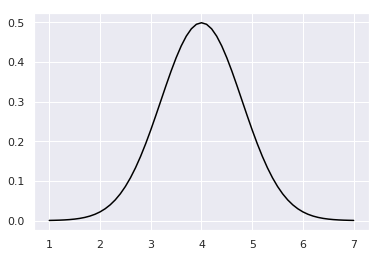

In [28]:
plt.plot(x,stats.norm.pdf(x = x,loc =4,scale=0.8),color="black")

正規分布の確率密度と母集団のヒストグラムを重ねる

/home/yu/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


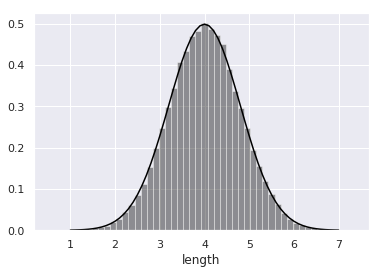

In [29]:
sns.distplot(fish100000,kde=False,norm_hist = True,color="black")
plt.plot(x,stats.norm.pdf(x = x,loc =4,scale=0.8),color="black")

ここでnorm_hist=1を指定したので、面積が1のヒストグラムを描画していることを忘れずに<br>
正規分布の確率密度と母集団のヒストグラムが極めてよく一致している<br>


## 標本が得られるプロセスの抽象化(stats.norm.rvs)

母集団は平均4,分散0.64の正規分布とみなすことができる<br>
これはすなわち、**母集団からの標本抽出は正規分布に従う乱数を発生させることとほぼ同じ**

ここまでは母集団そのもの(fishdata100000)からchoiceを用いて標本抽出していたが、<br>
ここからは最初から正規分布に従う乱数を発生させる関数を使う<br>
これが「母集団からの標本抽出シミュレーション」になっていることを理解するように

In [37]:
sampling_norm = stats.norm.rvs(
    loc = 4,scale = 0.8,size = 10
)
sampling_norm

array([2.783, 3.119, 4.285, 4.02 , 4.212, 5.11 , 4.429, 4.008, 4.074,
       3.848])

In [38]:
sp.mean(sampling_norm)

3.9888218914636133

## 有限母集団修正

先の議論には２つの飛躍がある<br>
1. 母集団のヒストグラムと正規分布の確率密度が等しいとみなしている点<br>
母集団分布に正規分布を仮定するという信念は、母集団が無限母集団であって、級数を無限に増やして無限に細かいヒストグラムを描くと<br>
正規分布の確率密度関数と一致するというものになる<br>
<br>
2. たかだか10万匹のデータを対象として議論していること<br>
10万匹という数は少なくないが、stats.norm.rvsによる乱数生成シミュレーションでは無限母集団からの<br>
ランダムサンプリングを仮定している<br>
<br>
**4st**からはシミュレーションにより標本の特長を明らかにしていくが、<br>
これは無限母集団で成立する議論である<br>
母集団が有限であった場合、厳密には有限母集団修正を行う必要がある<br>
<br>
ただし標本と比較して明らかに母集団が大きい場合、この修正を行う必要性は薄い<br>
１０万匹から１０を抽出する場合においては、有限母集団修正をする意味はほとんどない<br>
このノートは母集団は十分に大きいものと想定して進めていく

## 母集団分布を正規分布とみなしてもよいか

おそらく厳密には正規分布とは異なるだろうが、正規分布とみなして計算を行うことが多い<br>
と考えるものであるらしい<br>
正規分布は理論上マイナスをとることもあるが、今回は体長がマイナスになる理論上の確率が無視できるくらい低い<br>
ので、正規分布を用いても問題がないだろうと考えている<br>
<br>
また、データの対数を取ることで正規分布に近づける<br>
一般化線形モデルのように正規分布以外の母集団分布を想定した計算手法を使う<br>
こともある。<br>
母集団のヒストグラムを描くことは普通できないが、標本のヒストグラムを描くなどして、<br>
想定している確率分布と大きなズレがないかどうかを確認することもある